In [3]:
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
from os import listdir
import numpy as np

In [94]:
birdpath = "/code/COE379L-Final/cifar10_animals/bird"
catpath = "/code/COE379L-Final/cifar10_animals/cat"
deerpath = "/code/COE379L-Final/cifar10_animals/deer"
dogpath = "/code/COE379L-Final/cifar10_animals/dog"
frogpath = "/code/COE379L-Final/cifar10_animals/frog"
horsepath = "/code/COE379L-Final/cifar10_animals/horse"

paths = {
    "bird": birdpath,
    "cat": catpath,
    "deer": deerpath,
    "dog": dogpath,
    "frog": frogpath,
    "horse": horsepath
}

class_names = ["bird", "cat", "deer", "dog", "frog", "horse"]
label_map = {name: i for i, name in enumerate(class_names)}

X = []
y = []

# Load colored images
for name, path in paths.items():
    for img_name in os.listdir(path):
        if img_name.lower().endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(path, img_name)

            img = load_img(img_path, color_mode="rgb", target_size=(32, 32))

            img_array = img_to_array(img)    
            X.append(img_array)
            y.append(label_map[name])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Shuffle before splitting
idx = np.arange(len(X))
np.random.shuffle(idx)

X = X[idx]
y = y[idx]

print("Loaded X shape:", X.shape)   
print("Loaded y shape:", y.shape)   

Loaded X shape: (36000, 32, 32, 3)
Loaded y shape: (36000,)


In [5]:
print("Total images:", X.shape)
print("Total labels:", y.shape)

Total images: (36000, 32, 32, 3)
Total labels: (36000,)


In [6]:
print("Image shape (Height x Width x Channels):", X[0].shape)
print("All image shapes unique:", np.unique([img.shape for img in X], axis=0))

Image shape (Height x Width x Channels): (32, 32, 3)
All image shapes unique: [[32 32  3]]


In [7]:
print("Min pixel value:", X.min())
print("Max pixel value:", X.max())

Min pixel value: 0.0
Max pixel value: 255.0


In [95]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43, stratify = y)

# normalize data 
X_train = X_train/ 255.0
X_test  = X_test / 255.0

y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)

Displaying first 5 training images:


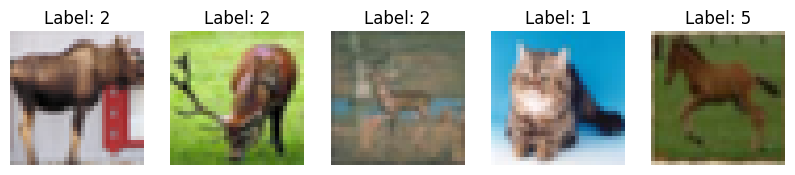

In [15]:
import matplotlib.pyplot as plt

# Plot for visualization of the first 5 color images
plt.figure(figsize=(10, 2)) 
print("Displaying first 5 training images:")

for i in range(5):
    image_rgb = X_train[i].reshape(32, 32, 3)  # Correct shape
    plt.subplot(1, 5, i+1)
    plt.imshow(image_rgb.astype('uint8'))  # Ensure correct type
    plt.axis('off')
    plt.title(f"Label: {y_train[i]}")
plt.show()

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_CIFAR = Sequential()

model_CIFAR.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_CIFAR.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model_CIFAR.add(MaxPooling2D(pool_size=(2, 2)))

model_CIFAR.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu', padding='same'))
model_CIFAR.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model_CIFAR.add(MaxPooling2D(pool_size=(2, 2)))

model_CIFAR.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model_CIFAR.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model_CIFAR.add(MaxPooling2D(pool_size=(2, 2)))

model_CIFAR.add(Flatten())
model_CIFAR.add(Dropout(0.5))

model_CIFAR.add(Dense(512, activation='relu'))

# Fully connected layer with num_classes neurons 
model_CIFAR.add(Dense(6, activation='softmax'))

In [105]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, start_from_epoch=5, restore_best_weights=True, verbose=1)
model_CIFAR.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_CIFAR.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=120, verbose=2, callbacks = [early_stopping])

Epoch 1/30
180/180 - 19s - 108ms/step - accuracy: 0.3215 - loss: 1.6127 - val_accuracy: 0.4441 - val_loss: 1.3919
Epoch 2/30
180/180 - 17s - 95ms/step - accuracy: 0.4759 - loss: 1.3364 - val_accuracy: 0.5281 - val_loss: 1.1925
Epoch 3/30
180/180 - 17s - 94ms/step - accuracy: 0.5433 - loss: 1.1829 - val_accuracy: 0.5761 - val_loss: 1.1057
Epoch 4/30
180/180 - 17s - 95ms/step - accuracy: 0.5863 - loss: 1.0814 - val_accuracy: 0.5852 - val_loss: 1.0823
Epoch 5/30
180/180 - 21s - 114ms/step - accuracy: 0.6206 - loss: 1.0079 - val_accuracy: 0.6378 - val_loss: 0.9496
Epoch 6/30
180/180 - 17s - 95ms/step - accuracy: 0.6487 - loss: 0.9331 - val_accuracy: 0.6522 - val_loss: 0.9163
Epoch 7/30
180/180 - 17s - 96ms/step - accuracy: 0.6677 - loss: 0.8918 - val_accuracy: 0.6548 - val_loss: 0.9090
Epoch 8/30
180/180 - 17s - 95ms/step - accuracy: 0.6875 - loss: 0.8392 - val_accuracy: 0.6485 - val_loss: 0.9431
Epoch 9/30
180/180 - 17s - 95ms/step - accuracy: 0.7025 - loss: 0.7898 - val_accuracy: 0.6911 

In [100]:
test_loss, test_accuracy = model_CIFAR.evaluate(X_test, y_test, verbose = 0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.6873863935470581
Test accuracy: 0.7562222480773926


In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))


In [92]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=0, start_from_epoch=5, restore_best_weights=True, verbose=1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=120, verbose=2, callbacks = [early_stopping])

Epoch 1/30
180/180 - 39s - 215ms/step - accuracy: 0.3278 - loss: 1.9317 - val_accuracy: 0.1620 - val_loss: 2.6575
Epoch 2/30
180/180 - 34s - 189ms/step - accuracy: 0.4513 - loss: 1.4413 - val_accuracy: 0.2515 - val_loss: 1.9743
Epoch 3/30
180/180 - 34s - 187ms/step - accuracy: 0.5190 - loss: 1.2544 - val_accuracy: 0.4691 - val_loss: 1.3525
Epoch 4/30
180/180 - 34s - 188ms/step - accuracy: 0.5681 - loss: 1.1269 - val_accuracy: 0.5267 - val_loss: 1.2554
Epoch 5/30
180/180 - 35s - 194ms/step - accuracy: 0.5960 - loss: 1.0618 - val_accuracy: 0.6020 - val_loss: 1.0597
Epoch 6/30
180/180 - 34s - 189ms/step - accuracy: 0.6185 - loss: 1.0098 - val_accuracy: 0.6107 - val_loss: 1.0180
Epoch 7/30
180/180 - 34s - 190ms/step - accuracy: 0.6375 - loss: 0.9652 - val_accuracy: 0.6430 - val_loss: 0.9348
Epoch 8/30
180/180 - 34s - 190ms/step - accuracy: 0.6568 - loss: 0.9184 - val_accuracy: 0.6367 - val_loss: 0.9743
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 7.


In [83]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.7515063881874084
Test accuracy: 0.734333336353302


In [93]:
for name, path in paths.items():
    print(name, "->", len(os.listdir(path)), "images")


bird -> 6000 images
cat -> 6000 images
deer -> 6001 images
dog -> 6000 images
frog -> 6000 images
horse -> 6000 images
